# Experiment 5  
Description :  
* n_fft = 4096 
* Silent parts removed  
* Vocal separated  
* Two classes (Abhogi , Basant)  
* Spectrograms of 5 second window size and 2 sec hop length




# Install libraries


In [ ]:
!cp -r "/gdrive/My Drive/Major Project/Images/Experiment 2/Data" "/content"

In [ ]:
!pip install flashtorch --quiet

In [ ]:
!pip install livelossplot --quiet

In [ ]:
!pip install InaSpeechSegmenter --quiet

In [1]:
!pip install librosa==0.8.0 --quiet

     |████████████████████████████████| 184kB 2.8MB/s 
     |████████████████████████████████| 51kB 4.8MB/s 


In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# Image generation code / commands

In [3]:
import os
# from inaSpeechSegmenter.segmenter import Segmenter
import librosa
import librosa.display
import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy as np
import gc

In [ ]:
def separate_speech_silence(input_file_name , intermediate_path , index):
	"""
	Removes slient parts of the audio and saves resulting wavefile to intermediate path
	"""
	seg = Segmenter()
 
	# print("Segmentation start")
	segmentation = seg(input_file_name)
 
	# print("Segmentation done")
	audio , fs = librosa.load(input_file_name)
 
	audio_result = np.array([])
	noise_result = np.array([])
	start_idx = 0
	for s in segmentation:
		if (s[0] == "music") or (s[0] == "male") or (s[0] == "female"):
			start_sample = librosa.time_to_samples(s[1])
			end_sample = librosa.time_to_samples(s[2])
			# print(start_sample , "\t" , end_sample)
			audio_result = np.append(audio_result , audio[start_sample : end_sample])
		else:
			start_sample = librosa.time_to_samples(s[1])
			end_sample = librosa.time_to_samples(s[2])
			# print(start_sample , "\t" , end_sample)
			noise_result = np.append(noise_result , audio[start_sample : end_sample])

	scipy.io.wavfile.write(os.path.join(intermediate_path , str(index) + ".wav") , fs , audio_result)
	scipy.io.wavfile.write(os.path.join(intermediate_path , str(index) + "_noise.wav") , fs , noise_result)
	

In [ ]:
def make_spec(intermediate_path , output_path , index):
    """
    Makes spectrogram images from audio present at intermediate path and saves images at output path
    """
    # stream = librosa.stream( os.path.join(intermediate_path , str(index)+".wav") , block_length=256, frame_length=2048, hop_length=1024)
    # plt.margins(0,0)
    # idx = 0
    # for y_block in stream:

    #     D_block = librosa.stft(y_block, center=False ,n_fft = 4096, hop_length=64)

    #     fig , ax = plt.subplots()
    #     librosa.display.specshow(D_block , y_axis="linear" , ax=ax)
    #     ax.set_ylim([0,1024])
    #     ax.set_ylabel("")
    #     plt.tick_params(axis="both" ,bottom=False , left=False)
    #     plt.yticks()
    #     ax.get_yaxis().set_visible(False)

    #     plt.savefig(os.path.join(output_path , str(index) + "_" + str(idx) + ".png" ) , bbox_inches="tight" , format="png" , pad_inches=0)
    #     fig.clf()
    #     plt.close()
    #     gc.collect()
    #     idx += 1

    window_length_in_sec = 5
    window_hop_in_sec = 2

    audio , fs = librosa.load(intermediate_path)

    start = 0
    end = window_length_in_sec * fs
    idx = 0
    while end < len(audio):
        D_block = librosa.stft(audio[start:end] , center=False , n_fft = 4096 , hop_length=64)
        fig , ax = plt.subplots()
        librosa.display.specshow(D_block , y_axis="linear" , ax=ax)
        ax.set_ylim([0,1024])
        ax.set_ylabel("")
        plt.tick_params(axis="both" ,bottom=False , left=False)
        plt.yticks()
        ax.get_yaxis().set_visible(False)

        plt.savefig(os.path.join(output_path , str(index) + "_" + str(idx) + ".png" ) , bbox_inches="tight" , format="png" , pad_inches=0)
        fig.clf()
        plt.close()
        gc.collect()

        idx += 1
        print(idx)
        start += window_hop_in_sec * fs
        end += window_hop_in_sec * fs



In [ ]:
def generate_images(input_path , audio_path, output_path , index):
    separate_speech_silence(input_path , audio_path , index)
    make_spec(audio_path , output_path , index)


In [ ]:
abhogi = ["/gdrive/My Drive/Major Project/Images/Experiment 2/Silent split Ragas/Basant/1.wav",
          "/gdrive/My Drive/Major Project/Images/Experiment 2/Silent split Ragas/Basant/2.wav",
          "/gdrive/My Drive/Major Project/Images/Experiment 2/Silent split Ragas/Basant/3.wav",
          "/gdrive/My Drive/Major Project/Images/Experiment 2/Silent split Ragas/Basant/4.wav",
          "/gdrive/My Drive/Major Project/Images/Experiment 2/Silent split Ragas/Basant/5.wav",
          "/gdrive/My Drive/Major Project/Images/Experiment 2/Silent split Ragas/Basant/6.wav",
          "/gdrive/My Drive/Major Project/Images/Experiment 2/Silent split Ragas/Basant/7.wav",
          "/gdrive/My Drive/Major Project/Images/Experiment 2/Silent split Ragas/Basant/8.wav",
          "/gdrive/My Drive/Major Project/Images/Experiment 2/Silent split Ragas/Basant/9.wav",
          "/gdrive/My Drive/Major Project/Images/Experiment 2/Silent split Ragas/Basant/10.wav"]
          

In [ ]:
file_list = abhogi
for idx in range(len(file_list)):
    print("Index " , idx)
    make_spec(file_list[idx] , "/gdrive/My Drive/Major Project/Images/Experiment 5/Spectrograms/Basant" , idx)

# Data Splitting

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
input_folder = "/gdrive/My Drive/Major Project/Images/Experiment 5/Spectrograms"
output_folder = "/gdrive/My Drive/Major Project/Images/Experiment 5/Data"
splitfolders.ratio(input_folder , output=output_folder, seed=42, ratio=(.8, .1, .1), group_prefix=None)

Copying files: 7015 files [12:59,  9.00 files/s]


# Imports

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms as transforms
import torch.optim as optim
from torchvision import datasets
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
from livelossplot import PlotLosses

# Data Loading

In [ ]:
# Data transforms : Resizing , Converting to Pytorch tensor , Nomralizing the image
# data_transforms = {
#     'train' : transforms.Compose([transforms.Resize(size=(324,216)),
#                                  transforms.ToTensor(),
#                                  transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]),
#     'valid': transforms.Compose([transforms.Resize(size=(324,216)),
#                                transforms.ToTensor(),
#                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]),
#     'test': transforms.Compose([transforms.Resize(size=(324,216)),
#                                transforms.ToTensor(),
#                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]) 
# }

data_transforms = {
    'train' : transforms.Compose([transforms.Resize(size=(324,216)),
                                 transforms.ToTensor(),
                                 ]),
    'valid': transforms.Compose([transforms.Resize(size=(324,216)),
                               transforms.ToTensor(),
                               ]),
    'test': transforms.Compose([transforms.Resize(size=(324,216)),
                               transforms.ToTensor(),
                               ]) 
}

main_dir = "/gdrive/My Drive/Major Project/Images/Experiment 5/Data"
# main_dir = "/content/Data"
train_dir = os.path.join(main_dir, "train")
test_dir = os.path.join(main_dir, "val")
valid_dir = os.path.join(main_dir, "test")

# Making dataset objects
train_data = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
valid_data = datasets.ImageFolder(valid_dir, transform=data_transforms['valid'])
test_data = datasets.ImageFolder(test_dir, transform=data_transforms['test'])

batch_size = 8
num_workers = 0

# Making dataloader objects
train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=True,
                                           drop_last = True,)
valid_loader = torch.utils.data.DataLoader(valid_data,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=True,
                                           drop_last=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                           batch_size=1, 
                                           num_workers=num_workers,
                                           shuffle=True)
loaders = {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
}

# Modeling


In [ ]:
"""
This method returns Sequential Conv2d with/without batch normalisation of given size, same size by default
"""
def conv(in_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False, batch_norm=False):
    layers = []
    layers.append(nn.Conv2d(in_channels, out_channels, kernel_size, stride=stride, padding=padding, bias=bias))
    if batch_norm:
        layers.append(nn.BatchNorm2d(out_channels))
    return nn.Sequential(*layers)

"""
Returns Maxpool2D, shrinks in half by default
"""
def pool(kernel_size=2, stride=2, padding=0):
    layers = []
    layers.append(nn.MaxPool2d(kernel_size, stride=stride, padding=padding))
    return nn.Sequential(*layers)

"""
Modify this to experiment on CNN architecture
Basic flow => Conv => BatchNorm => Activation => Dropout => Pooling
"""
class CNN(nn.Module):

    """
    Change in architecture must change forward function
    """
    def __init__(self, output_size=10):
        super(CNN, self).__init__()
        self.conv1 = conv(3, 32, 3, stride=1, padding=1, batch_norm=True)
        self.pool1 = pool(3, stride=3, padding=0)
        self.conv2 = conv(32, 64, 3, stride=1, padding=1, batch_norm=True)
        self.pool2 = pool(2, stride=2, padding=0)
        self.conv3 = conv(64, 64, 3, stride=1, padding=1, batch_norm=True)
        self.pool3 = pool(2, stride=2, padding=0)
        self.conv4 = conv(64, 64, 3, stride=1, padding=1, batch_norm=True)
        self.pool4 = pool(2, stride=2, padding=0)
        # TODO: write input size of FC1
        self.fc1 = nn.Linear(13*9*64, 512)
        self.fc2 = nn.Linear(512, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.conv1(x)                              # (324,216,3) => (324 , 216 , 32)
        x = F.relu(x)
        x = self.dropout(x)                           
        x = self.pool1(x)                              # (324 , 216 , 32) => (108 , 72 , 32)
        
        # print("Shape after 1st pooling layer " , x.shape)
        # One liner for all
        x = self.pool2(self.dropout(F.relu(self.conv2(x))))   # (107 , 71 , 32) => (107 , 71 , 64) => (54 , 36 , 64)
        # print("Shape after 2nd pooling layer " , x.shape)
        
        x = self.pool3(self.dropout(F.relu(self.conv3(x))))   #(54 , 36 , 64) => (54 , 36 , 128) => (27 , 18 , 64)
        # print("Shape after 3rd pooling layer " , x.shape)
        
        x = self.pool4(self.dropout(F.relu(self.conv4(x))))   # (13 , 9 , 64) 
        # print("Shape after 4th pooling layer " , x.shape)
        
        # Flatten                                             
        x = x.view(-1, x.shape[3]*x.shape[1]*x.shape[2])
        # print("Shape after flattening " , x.shape)
        
        x = F.relu(self.fc1(x))
        # print("Shape after FC 1 " , x.shape)

        x = self.dropout(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Training



In [ ]:
def train(model, loaders, n_epochs, optimizer, criterion, device, save_path, print_every=100 , stop_after=3):
    valid_loss_min = np.Inf
    stop = stop_after
    liveloss = PlotLosses()

    for epoch in range(1, n_epochs+1):
        logs = {}
        
        train_loss = 0.0
        valid_loss = 0.0
        running_loss_t = 0.0
        running_correct_t = 0
        running_loss_v = 0.0
        running_correct_v = 0.0
        print("Epoch number start " ,str(epoch) )
        # training
        model.train()
        for batch_index, (data, target) in enumerate(loaders['train']):
            if device == 'cuda':
                data, target = data.cuda(), target.cuda()

            optimizer.zero_grad()         
            pred = model(data)
            loss = criterion(pred, target)
            loss.backward()
            optimizer.step()

            running_loss_t += loss.detach()*data.size(0)
            # running_corrects_ += torch.sum(pred == target)
            train_loss += ((1 / (batch_index + 1)) * (loss.data - train_loss))

            if batch_index%print_every == 0:
                print(f"Epoch {epoch} Batch {batch_index} loss {train_loss}")
        
        epoch_loss_t = running_loss_t / len(loaders["train"].dataset)
        logs["log loss"] = epoch_loss_t.item()
        
        
        # validation
        model.eval()
        for batch_index, (data, target) in enumerate(loaders['valid']):
            if device == 'cuda':
                data, target = data.cuda(), target.cuda()

            pred = model(data)
            loss = criterion(pred, target)
            running_loss_v += loss.detach()*data.size(0)
            valid_loss += ((1 / (batch_index + 1)) * (loss.data - valid_loss))

        epoch_loss_v = running_loss_v / len(loaders["valid"].dataset)
        logs["val_log loss"] = epoch_loss_v.item()

        liveloss.update(logs)
        liveloss.send()

        print(f"Epoch: {epoch} Training Loss: {train_loss} Validation Loss: {valid_loss}")

        if valid_loss > valid_loss_min:
            torch.save(model.state_dict(), save_path)
            print(f"Validation Loss decreased from {valid_loss_min} to {valid_loss}. Saving model...")
            valid_loss_min = valid_loss
            stop_after = stop
        else:
            stop_after -= 1

        if stop_after == 0:
            return model
        print("Epoch end ",str(epoch))
    return model

# Main


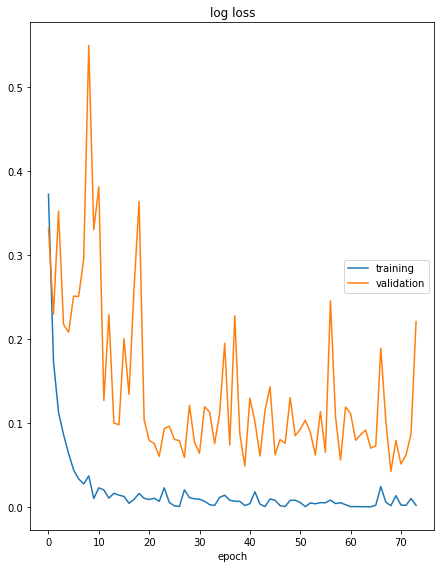

log loss
	training         	 (min:    0.000, max:    0.372, cur:    0.002)
	validation       	 (min:    0.042, max:    0.549, cur:    0.221)
Epoch: 74 Training Loss: 0.0017432407476007938 Validation Loss: 0.22058947384357452
Epoch end  74
Epoch number start  75
Epoch 75 Batch 0 loss 0.0


In [ ]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
model = CNN(output_size=5)

if device == 'cuda':
    model = model.cuda()

model = model.cuda()
# Loss class
criterion = torch.nn.NLLLoss()
# Optimizer class
optimizer = optim.Adam(params=model.parameters() , lr=0.0001)

model = train(model, loaders, 200, optimizer, criterion, device, os.path.join("/gdrive/My Drive/Major Project/Images/Experiment 5","model.pt"), print_every=100 , stop_after=300)
# test(model, loaders, criterion, device)

# Testing


In [ ]:
def test(model, loaders, criterion, device):
    test_loss = 0.0
    correct = 0.0
    total = 0.0

    model.eval()
    for batch_index, (data, target) in enumerate(loaders['test']):
        if device == 'cuda':
            data, target = data.cuda(), target.cuda()
        pred = model(data)
        loss = criterion(pred, target)
        test_loss += ((1 / (batch_index + 1)) * (loss.data - test_loss))
        pred = pred.data.max(1, keepdim=True)[1]
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)

    print(f"Test loss {test_loss}")
    print(f"Testing accuracy {correct/total}")

In [ ]:
print(len(loaders["test"].dataset))

320


In [ ]:
# model = torch.load(os.path.join("/gdrive/My Drive/Major Project/Images/Experiment 1","model.pt"))
# model = CNN(output_size = 2)
# model.load_state_dict(torch.load(os.path.join("/gdrive/My Drive/Major Project/Images/Experiment 1","model.pt")))
# model = model.cuda()
test(model, loaders, criterion, device)

Test loss 0.42829614877700806
Testing accuracy 0.9


In [ ]:
torch.save(model.state_dict() , os.path.join("/gdrive/My Drive/Major Project/Images/Experiment 2","model_5classes_200e.pt"))

# LSTM data preparation

In [ ]:
"""
Making a dataframe of all spectrogram files' path and their class
"""
import pandas as pd

path_df = pd.DataFrame(columns=["Path" , "Name" , "Raga"])
paths = []
names = []
ragas = []

dataset_path = "/gdrive/My Drive/Major Project/Images/Experiment 1/Spectrograms"

for file_name in os.listdir(os.path.join(dataset_path , "Abhogi")):
    paths.append(os.path.join(dataset_path , "Abhogi" , file_name))
    names.append(file_name.split("_")[0])
    ragas.append("Abhogi")

for file_name in os.listdir(os.path.join(dataset_path , "Basant")):
    paths.append(os.path.join(dataset_path , "Basant" , file_name))
    names.append(file_name.split("_")[0])
    ragas.append("Basant")

path_df.Path = paths
path_df.Name = names
path_df.Raga = ragas

path_df.to_csv(dataset_path + str("/file.csv"))

raga_name_groupby = path_df.groupby(by=["Raga" , "Name"])
# print(raga_name_groupby.count())

             Path
Raga   Name      
Abhogi 1       57
       10      27
       2       47
       3      124
       4       21
       5       65
       6      107
       7       53
       8       42
       9       80
Basant 1       35
       10      66
       2       44
       3       33
       4       74
       5       69
       6       67
       7      108
       8       20
       9       55


In [ ]:
"""
Making sequences from the input 
"""
def batch_data(words, sequence_length, batch_size , raga_name , features , target):    
    n_targets = len(words) - sequence_length
    
    if n_targets < 1:
        return 
    
    for i in range(n_targets):
        end_idx = i + sequence_length
        
        batch = words[i : end_idx]
        features.append(batch)
        target.append(raga_name)
        
    return features , target

In [ ]:
"""
Saving pickle files of sequences of paths
"""
import pickle

raga_names = ["Abhogi"]

for raga_name in raga_names:
    features = []
    target = []
    for i in range(1,11):
        # print("Starting " , i)
        features , target = batch_data(list(raga_name_groupby.get_group((raga_name,str(i))).Path) , 3 , 1 , raga_name , features , target)
        # print("Ending " , i)
    
    # print(len(target))
    with open(os.path.join("/gdrive/My Drive/Major Project/Images/Experiment 1/Paths" , raga_name + "_feature") , "wb") as f:
        pickle.dump(features , f)
    with open(os.path.join("/gdrive/My Drive/Major Project/Images/Experiment 1/Paths" , raga_name + "_target") , "wb") as f:
        pickle.dump(target , f)
print(features)

[['/gdrive/My Drive/Major Project/Images/Experiment 1/Spectrograms/Abhogi/1_0.png', '/gdrive/My Drive/Major Project/Images/Experiment 1/Spectrograms/Abhogi/1_1.png', '/gdrive/My Drive/Major Project/Images/Experiment 1/Spectrograms/Abhogi/1_2.png'], ['/gdrive/My Drive/Major Project/Images/Experiment 1/Spectrograms/Abhogi/1_1.png', '/gdrive/My Drive/Major Project/Images/Experiment 1/Spectrograms/Abhogi/1_2.png', '/gdrive/My Drive/Major Project/Images/Experiment 1/Spectrograms/Abhogi/1_3.png'], ['/gdrive/My Drive/Major Project/Images/Experiment 1/Spectrograms/Abhogi/1_2.png', '/gdrive/My Drive/Major Project/Images/Experiment 1/Spectrograms/Abhogi/1_3.png', '/gdrive/My Drive/Major Project/Images/Experiment 1/Spectrograms/Abhogi/1_4.png'], ['/gdrive/My Drive/Major Project/Images/Experiment 1/Spectrograms/Abhogi/1_3.png', '/gdrive/My Drive/Major Project/Images/Experiment 1/Spectrograms/Abhogi/1_4.png', '/gdrive/My Drive/Major Project/Images/Experiment 1/Spectrograms/Abhogi/1_5.png'], ['/gdri

In [ ]:
"""
Loading pickle files
"""
import pickle
abhogi_fv = pickle.load(open("/gdrive/My Drive/Major Project/Images/Experiment 1/Paths/Abhogi_feature" , "rb"))
abhogi_t = pickle.load(open("/gdrive/My Drive/Major Project/Images/Experiment 1/Paths/Abhogi_target" , "rb"))
basant_fv = pickle.load(open("/gdrive/My Drive/Major Project/Images/Experiment 1/Paths/Basant_feature" , "rb"))
basant_t = pickle.load(open("/gdrive/My Drive/Major Project/Images/Experiment 1/Paths/Basant_target" , "rb"))

In [ ]:
"""
Train test split
"""
from sklearn.model_selection import train_test_split

X_train ,  X_test , y_train ,y_test = train_test_split(abhogi_fv + basant_fv , abhogi_t + basant_t , test_size = 0.2)
X_valid ,  X_test , y_valid ,y_test = train_test_split(X_test ,y_test, test_size = 0.5)

print(len(X_train))
# print(X_train)
print(len(X_valid))
print(len(X_test))

907
113
114


In [ ]:
"""
Custom Dataset class inheriting abstract Dataset class
"""
class SequenceDataset(torch.utils.data.Dataset):
    def __init__(self , x , y , cnn_model , test_transforms):
        self.x = x
        self.y = y
        self.cnn_model = cnn_model
        self.cnn_model.eval()
        self.test_transforms = test_transforms

    def __len__(self):
        return(len(self.x))

    def __getitem__(self , idx):
        """
        Returns sequence of feature vectors by getting output from cnn model
        """
        arr = self.x[idx]
        out = []
        for path in arr:
            with open(path, 'rb') as f:
                img = Image.open(f)
                img = img.convert('RGB')
            img = self.test_transforms(img)
            
            output = self.cnn_model(img.unsqueeze(0))
            output = output.reshape(-1,13*9*64)
            out.append(output)
            
        if self.y[idx] == "Abhogi":
            t = torch.Tensor([0]).long()
        else:
            t= torch.Tensor([1]).long()

        return torch.stack(out) , t


# Transforms
test_transforms = transforms.Compose([transforms.Resize(size=(324,216)),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

# Loading the CNN model and removing the fully connected layers
model = CNN(output_size = 2)
model.load_state_dict(torch.load(os.path.join("/gdrive/My Drive/Major Project/Images/Experiment 1","bs1_e10_model.pt") ,  map_location=torch.device('cpu')))

cnn_model = nn.Sequential(*list(model.children())[:8])

# Making dataset objects
train_dataset = SequenceDataset(X_train , y_train , cnn_model , test_transforms)
valid_dataset = SequenceDataset(X_valid , y_valid , cnn_model , test_transforms)
test_dataset = SequenceDataset(X_test , y_test , cnn_model , test_transforms)



In [ ]:
# Making Dataloader objects
loaders = {
    "train" : torch.utils.data.DataLoader(train_dataset,
                                           batch_size=1, 
                                           num_workers=0,
                                           shuffle=True,
                                           drop_last = False) ,
    "valid" : torch.utils.data.DataLoader(valid_dataset,
                                           batch_size=1, 
                                           num_workers=0,
                                           shuffle=True,
                                           drop_last = False) ,
    "test" : torch.utils.data.DataLoader(test_dataset,
                                           batch_size=1, 
                                           num_workers=0,
                                           shuffle=True,
                                           drop_last = False)
}

# LSTM Modeling

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self , input_size = 1 , hidden_layer_size = 256 , output_size = 2):
        super(LSTMModel, self).__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size , hidden_layer_size)
        self.fc = nn.Linear(hidden_layer_size , output_size)
        self.softmax = nn.Softmax(dim=0)

    def forward(self , input_seq , hidden_cell):
        self.lstm.flatten_parameters()
        
        # hidden_cell = (torch.zeros(1,1,256).cuda(),
        #             torch.zeros(1,1,256).cuda())
        print(input_seq[:10])
        lstm_out , hidden_cell = self.lstm(input_seq , hidden_cell)
        lstm_output = lstm_out.view(-1, self.hidden_layer_size)
        lstm_output = lstm_output[-1,:]
        # print(lstm_output.shape)
        model_output = self.fc(lstm_output)
        # print(model_output.shape)
        probabilities = self.softmax(model_output)
        return probabilities , hidden_cell
        

# LSTM training

In [ ]:
model_seq = LSTMModel(input_size = 7488)

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(params=model_seq.parameters())

model_seq = model_seq.cuda()
model_seq = train_lstm(model_seq  , loaders , 10 , optimizer , criterion , "cuda" , os.path.join("/gdrive/My Drive/Major Project/Images/Experiment 1","lstm_model.pt") , print_every = 10)


Epoch number start  1
Epoch 1 Batch 0 loss 0.767638087272644
Epoch 1 Batch 10 loss 0.7972508072853088
Epoch 1 Batch 20 loss 0.7090938687324524
Epoch 1 Batch 30 loss 0.7347487807273865
Epoch 1 Batch 40 loss 0.7245967984199524
Epoch 1 Batch 50 loss 0.7302318811416626
Epoch 1 Batch 60 loss 0.7310546636581421
Epoch 1 Batch 70 loss 0.7283251881599426
Epoch 1 Batch 80 loss 0.7218202352523804
Epoch 1 Batch 90 loss 0.7224344611167908
Epoch 1 Batch 100 loss 0.7169500589370728
Epoch 1 Batch 110 loss 0.716142475605011
Epoch 1 Batch 120 loss 0.719276487827301
Epoch 1 Batch 130 loss 0.7172145247459412
Epoch 1 Batch 140 loss 0.7141038775444031
Epoch 1 Batch 150 loss 0.7117770314216614
Epoch 1 Batch 160 loss 0.7126654386520386
Epoch 1 Batch 170 loss 0.712833046913147
Epoch 1 Batch 180 loss 0.7134035229682922
Epoch 1 Batch 190 loss 0.7105441689491272
Epoch 1 Batch 200 loss 0.7128949165344238
Epoch 1 Batch 210 loss 0.712570309638977
Epoch 1 Batch 220 loss 0.7121443748474121
Epoch 1 Batch 230 loss 0.711

KeyboardInterrupt: ignored

In [ ]:
def train_lstm(model , loader , n_epochs , optimizer , criterion , device , save_path , print_every=100 , stop_after = 3):
    valid_loss_min = np.Inf
    stop = stop_after
    hidden_cell = (torch.zeros(1,1,256).cuda(),
                    torch.zeros(1,1,256).cuda())
    # hidden_cell = hidden_cell.cuda()
    for epoch in range(1, n_epochs+1):
        train_loss = 0.0
        valid_loss = 0.0
        print("Epoch number start " ,str(epoch) )
        # training
        model.train()
        for batch_index, (data, target) in enumerate(loader["train"]):    # for sequence in sequences
            if device == 'cuda':
                data, target = data.cuda(), target.cuda()
            data = torch.squeeze(data , dim=0)
            # print("Data size " , data.shape)
            target = torch.squeeze(target , dim=0)
            # print("Target size " , target.shape)
            # print("Target " , target)

            optimizer.zero_grad()         
            pred , hidden_cell_ = model(data , hidden_cell)
            pred = torch.unsqueeze(pred , 0)
            # print("Pred " , pred.shape)
            # print("Prediction" , pred)
            
            # hidden_cell[0].detach_()
            # hidden_cell[1].detach_()

            # print("Predicted " , pred , " Target " , target)
            loss = criterion(pred, target)
            model.train()
            loss.backward()
            optimizer.step()

            train_loss += ((1 / (batch_index + 1)) * (loss.data - train_loss))

            if batch_index%print_every == 0:
                print(f"Epoch {epoch} Batch {batch_index} loss {train_loss}")

        # validation
        model.eval()
        with torch.no_grad():
            for batch_index, (data, target) in enumerate(loader['valid']):
                if device == 'cuda':
                    data, target = data.cuda(), target.cuda()
                # print("VAlid data shape " , data.shape)
                data = torch.squeeze(data , dim=0)
                target = torch.squeeze(target , dim=0)

                pred , hidden_cell = model(data , hidden_cell)
                pred = torch.unsqueeze(pred , 0)

                loss = criterion(pred , target)
                valid_loss += ((1 / (batch_index + 1)) * (loss.data - valid_loss))

        print(f"Epoch: {epoch} Training Loss: {train_loss} Validation Loss: {valid_loss}")

        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            print(f"Validation Loss decreased from {valid_loss_min} to {valid_loss}. Saving model...")
            valid_loss_min = valid_loss
            stop_after = stop
        else:
            stop_after -= 1

        if stop_after == 0:
            return model
        print("Epoch end ",str(epoch))
    return model

In [ ]:
import gc
gc.collect()

899

In [ ]:
def test(model, loaders, criterion, device):
    test_loss = 0.0
    correct = 0.0
    total = 0.0
    
    
    model.eval()
    for batch_index, (data, target) in enumerate(loaders['test']):
        if device == 'cuda':
            data, target = data.cuda(), target.cuda()
        data = torch.squeeze(data , dim=0)
        target = torch.squeeze(target , dim=0)
        
        hidden_cell = (torch.zeros(1,1,256).cuda(),
                    torch.zeros(1,1,256).cuda())
        
        pred  , hidden_cell = model(data , hidden_cell)
        pred = torch.unsqueeze(pred , 0)

        print("Prediction " , pred , " Target " , target)
        loss = criterion(pred, target)
        test_loss += ((1 / (batch_index + 1)) * (loss.data - test_loss))
        pred = pred.data.max(1, keepdim=True)[1]
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)

    print(f"Test loss {test_loss}")
    print(f"Testing accuracy {correct/total}")

In [ ]:
model_path = "/gdrive/My Drive/Major Project/Images/Experiment 1/lstm_model.pt"

model = LSTMModel(input_size=7488)
model.load_state_dict(torch.load(os.path.join("/gdrive/My Drive/Major Project/Images/Experiment 1","lstm_model.pt")))
model = model.cuda()
criterion = torch.nn.CrossEntropyLoss()
test(model, loaders, criterion, "cuda")

tensor([[[2.2063, 2.5717, 2.6743,  ..., 1.3967, 1.3616, 0.9110]],

        [[2.1732, 2.6442, 2.6574,  ..., 1.4135, 1.3973, 1.0128]],

        [[2.1072, 2.5737, 2.4711,  ..., 1.5206, 1.5285, 1.0942]]],
       device='cuda:0', grad_fn=<SliceBackward>)
Prediction  tensor([[0.6223, 0.3777]], device='cuda:0', grad_fn=<UnsqueezeBackward0>)  Target  tensor([1], device='cuda:0')
tensor([[[2.2189, 2.6144, 2.5751,  ..., 1.1925, 1.2059, 0.9625]],

        [[1.8403, 2.4216, 2.4074,  ..., 1.5296, 1.5316, 1.0789]],

        [[1.4118, 1.7334, 2.4824,  ..., 1.4117, 1.4619, 1.0462]]],
       device='cuda:0', grad_fn=<SliceBackward>)
Prediction  tensor([[0.6223, 0.3777]], device='cuda:0', grad_fn=<UnsqueezeBackward0>)  Target  tensor([0], device='cuda:0')
tensor([[[2.0904, 2.5838, 2.6120,  ..., 1.3173, 1.2219, 0.9045]],

        [[2.1722, 2.5863, 2.5882,  ..., 1.1711, 1.1668, 0.8438]],

        [[2.3033, 2.6930, 2.6991,  ..., 1.2107, 1.2031, 0.8463]]],
       device='cuda:0', grad_fn=<SliceBackward>)
Pr

# Model Interpretation


In [ ]:
from flashtorch.saliency.backprop import Backprop
from flashtorch.utils import load_image

In [ ]:
# model = torch.load(os.path.join("/gdrive/My Drive/Major Project/Images/Experiment 2","model.pt"))
model = CNN(output_size = 5)
model.load_state_dict(torch.load(os.path.join("/gdrive/My Drive/Major Project/Images/Experiment 2/model_5classes_200e.pt")))


<All keys matched successfully>

In [ ]:
backprop = Backprop(model)

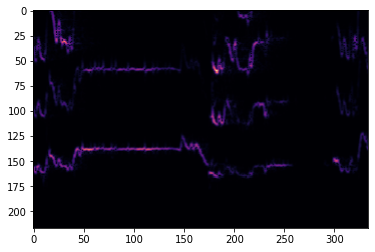

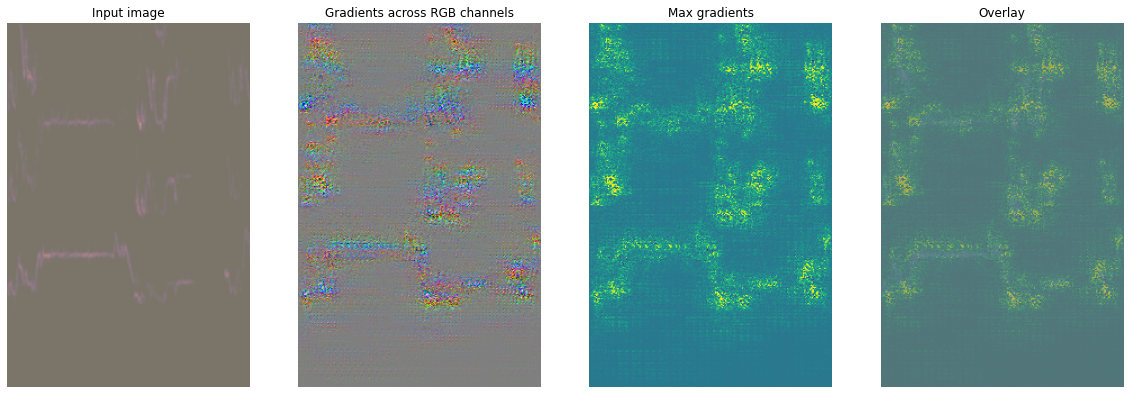

In [ ]:
image = load_image("/gdrive/My Drive/Major Project/Images/Experiment 2/Data/test/Abhogi/9_49.png")

plt.imshow(image)
inp = data_transforms["test"](image)
inp = inp.unsqueeze(dim=0)
inp.requires_grad = True

backprop.visualize(inp , 0 , guided=False , figsize=(20,10))


# Experiments

In [6]:
def plot_zcr(path):
    window_length_in_sec = 10
    window_hop_in_sec = 10

    audio , fs = librosa.load(path)

    start = 0
    end = window_length_in_sec * fs
    idx = 0
    zcr = []
    while end < len(audio):
        zero_crossings = librosa.zero_crossings(audio[start:end])
        print(idx*window_length_in_sec , "-",(idx+1)*window_length_in_sec ,sum(zero_crossings))
        zcr.append(sum(zero_crossings))
        idx += 1
        start += window_hop_in_sec * fs
        end += window_hop_in_sec * fs

    plt.plot(zcr)
    plt.show()

In [11]:
from scipy.signal import find_peaks
def plot_peaks(path):
    window_length_in_sec = 10
    window_hop_in_sec = 10

    audio , fs = librosa.load(path)

    start = 0
    end = window_length_in_sec * fs
    idx = 0
    peak_arr = []
    while end < len(audio):
        peaks , _ = find_peaks(audio[start : end])
        print(idx*window_length_in_sec , "-",(idx+1)*window_length_in_sec ,len(peaks))
        print(len(peaks))
        peak_arr.append(len(peaks))
        idx += 1
        start += window_hop_in_sec * fs
        end += window_hop_in_sec * fs
        
    plt.plot(peak_arr)
    plt.show()

0 - 10 19210
19210
10 - 20 36582
36582
20 - 30 23826
23826
30 - 40 45981
45981
40 - 50 36649
36649
50 - 60 22822
22822
60 - 70 22214
22214
70 - 80 34980
34980
80 - 90 20987
20987
90 - 100 19666
19666
100 - 110 19235
19235
110 - 120 28291
28291
120 - 130 19786
19786
130 - 140 20301
20301
140 - 150 16866
16866
150 - 160 24728
24728
160 - 170 19411
19411
170 - 180 20179
20179
180 - 190 31264
31264
190 - 200 20397
20397
200 - 210 22917
22917
210 - 220 25474
25474
220 - 230 19030
19030
230 - 240 24140
24140
240 - 250 34053
34053
250 - 260 22650
22650
260 - 270 31352
31352
270 - 280 18302
18302
280 - 290 27218
27218
290 - 300 11728
11728
300 - 310 29037
29037
310 - 320 14965
14965
320 - 330 25630
25630
330 - 340 25012
25012
340 - 350 13310
13310
350 - 360 19615
19615
360 - 370 15512
15512
370 - 380 17666
17666
380 - 390 43923
43923
390 - 400 49477
49477
400 - 410 28393
28393
410 - 420 18342
18342
420 - 430 21928
21928
430 - 440 31278
31278
440 - 450 20866
20866
450 - 460 17073
17073
460 - 47

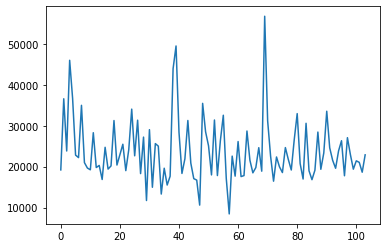

In [12]:
plot_peaks("/gdrive/My Drive/Major Project/Vocals/Abhogi/Bonus_Track_b63f8746-775e-447b-8bd5-1f32c4ef0b44/vocals.wav")

In [19]:
def plot_audio(path):
    window_length_in_sec = 10
    window_hop_in_sec = 10

    audio , fs = librosa.load(path)

    start = 0
    end = window_length_in_sec * fs
    idx = 0
    peak_arr = []
    while end < len(audio):
        print(idx*window_length_in_sec , "-",(idx+1)*window_length_in_sec)
        peaks , _ = find_peaks(audio[start : end])
        print("Peaks " , len(peaks))
        zero_crossings = librosa.zero_crossings(audio[start:end])
        print("Zero crossings " , sum(zero_crossings))
        plt.plot(audio[start:end])
        plt.show()
        idx += 1
        start += window_hop_in_sec * fs
        end += window_hop_in_sec * fs
        
    # plt.plot(peak_arr)
    # plt.show()

0 - 10
Peaks  19210
Zero crossings  9589


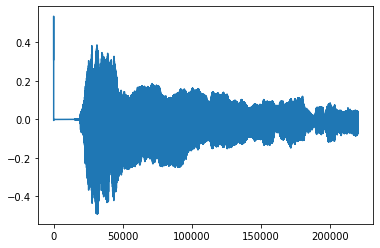

10 - 20
Peaks  36582
Zero crossings  39854


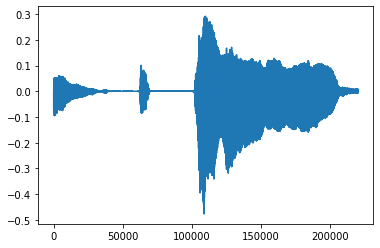

20 - 30
Peaks  23826
Zero crossings  27347


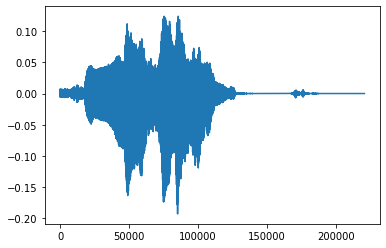

30 - 40
Peaks  45981
Zero crossings  59763


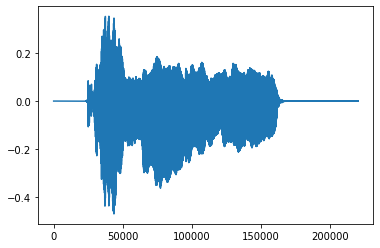

40 - 50
Peaks  36649
Zero crossings  34817


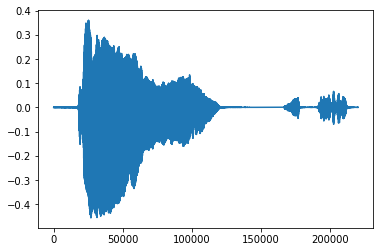

50 - 60
Peaks  22822
Zero crossings  20429


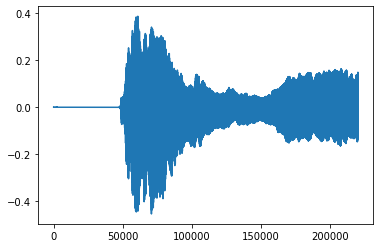

60 - 70
Peaks  22214
Zero crossings  12628


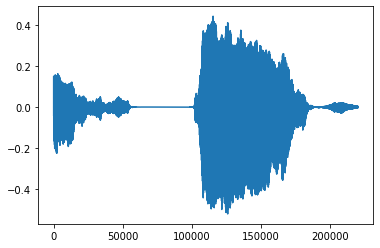

70 - 80
Peaks  34980
Zero crossings  36294


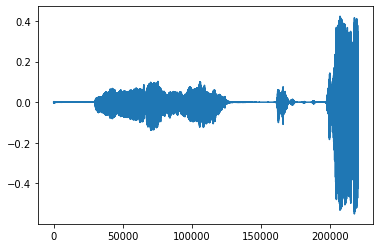

80 - 90
Peaks  20987
Zero crossings  12599


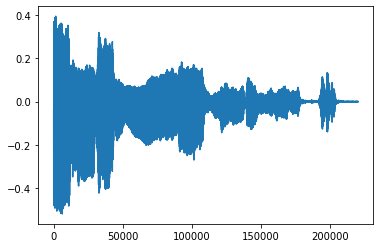

90 - 100
Peaks  19666
Zero crossings  16213


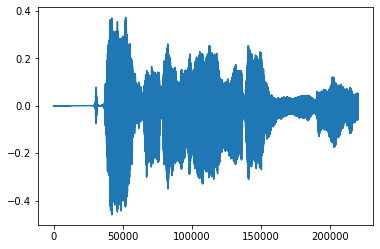

100 - 110
Peaks  19235
Zero crossings  13080


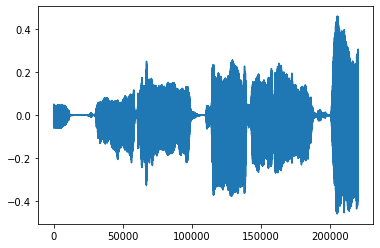

110 - 120
Peaks  28291
Zero crossings  23134


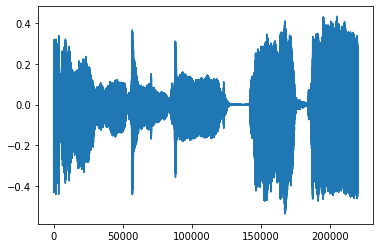

120 - 130
Peaks  19786
Zero crossings  14327


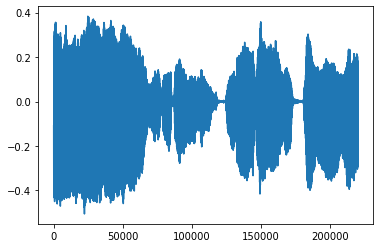

130 - 140
Peaks  20301
Zero crossings  13271


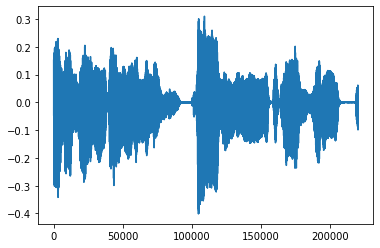

140 - 150
Peaks  16866
Zero crossings  11606


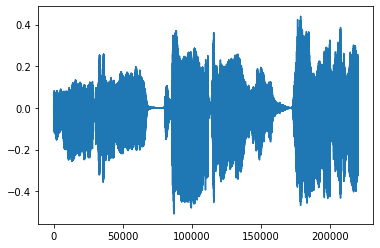

150 - 160
Peaks  24728
Zero crossings  21364


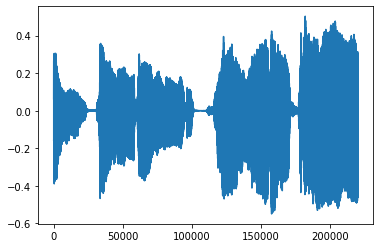

160 - 170
Peaks  19411
Zero crossings  13059


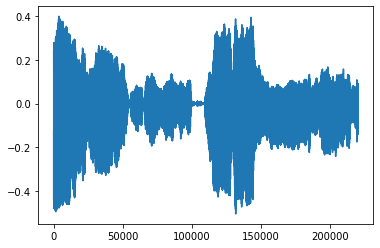

170 - 180
Peaks  20179
Zero crossings  14460


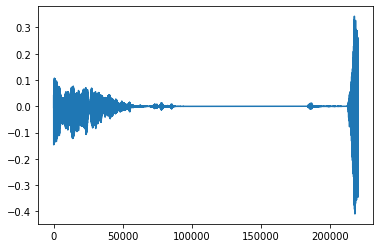

180 - 190
Peaks  31264
Zero crossings  26419


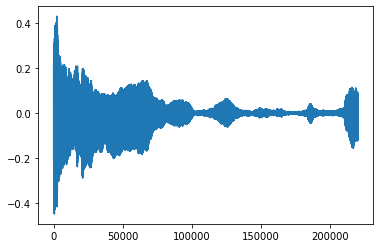

190 - 200
Peaks  20397
Zero crossings  18775


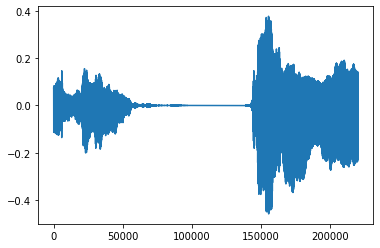

200 - 210
Peaks  22917
Zero crossings  18734


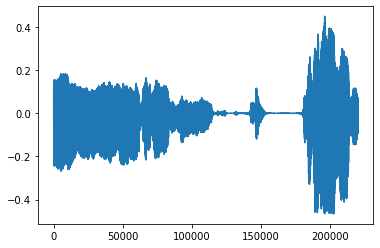

210 - 220
Peaks  25474
Zero crossings  12511


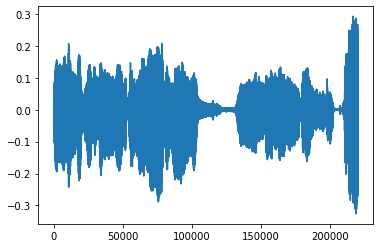

220 - 230
Peaks  19030
Zero crossings  12299


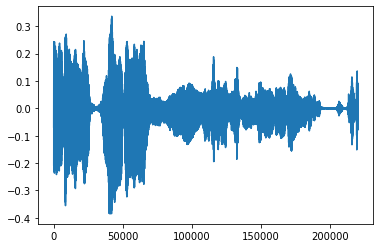

230 - 240
Peaks  24140
Zero crossings  31645


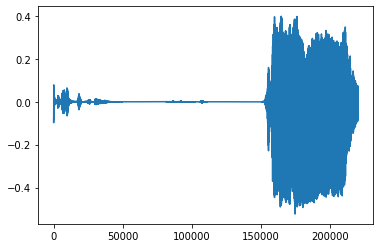

240 - 250
Peaks  34053
Zero crossings  48594


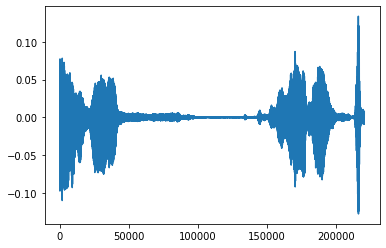

250 - 260
Peaks  22650
Zero crossings  17571


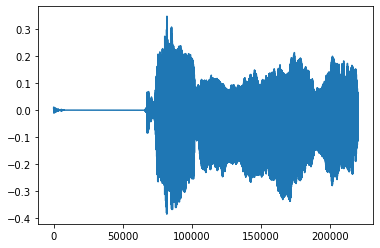

260 - 270
Peaks  31352
Zero crossings  34844


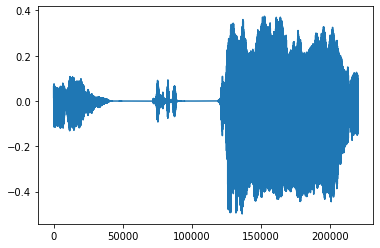

270 - 280
Peaks  18302
Zero crossings  11477


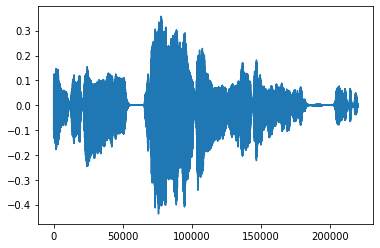

280 - 290
Peaks  27218
Zero crossings  25791


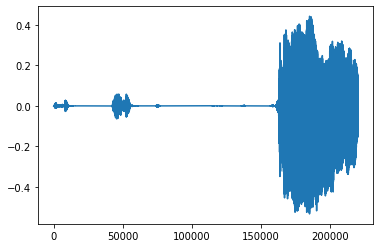

290 - 300
Peaks  11728
Zero crossings  9235


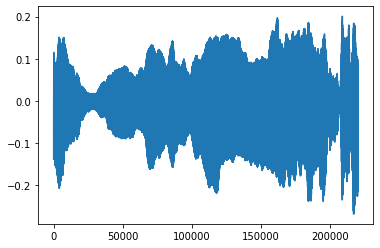

300 - 310
Peaks  29037
Zero crossings  24965


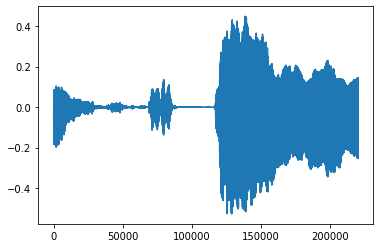

310 - 320
Peaks  14965
Zero crossings  16875


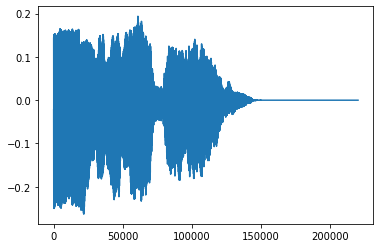

320 - 330
Peaks  25630
Zero crossings  23402


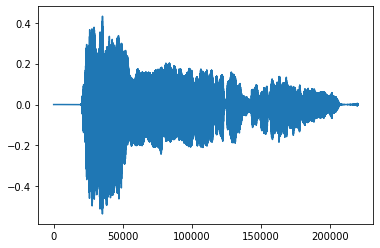

330 - 340
Peaks  25012
Zero crossings  25447


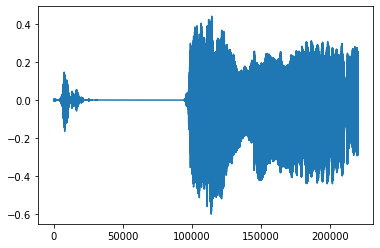

340 - 350
Peaks  13310
Zero crossings  11380


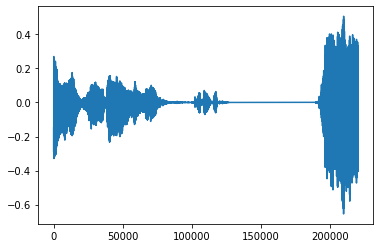

350 - 360
Peaks  19615
Zero crossings  13332


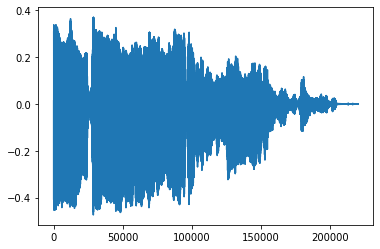

360 - 370
Peaks  15512
Zero crossings  18430


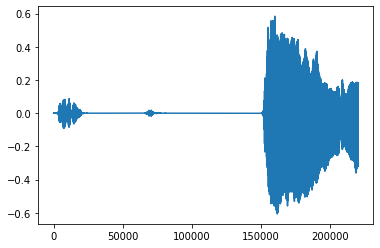

370 - 380
Peaks  17666
Zero crossings  22471


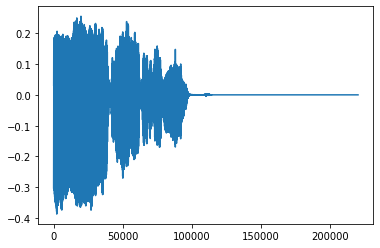

380 - 390
Peaks  43923
Zero crossings  37829


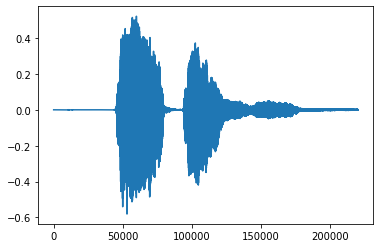

390 - 400
Peaks  49477
Zero crossings  83220


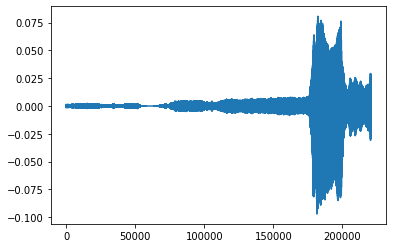

400 - 410
Peaks  28393
Zero crossings  41050


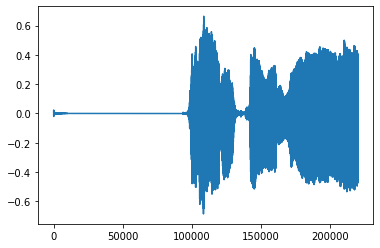

410 - 420
Peaks  18342
Zero crossings  22335


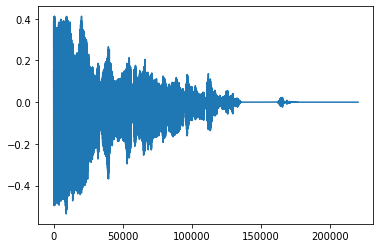

420 - 430
Peaks  21928
Zero crossings  30863


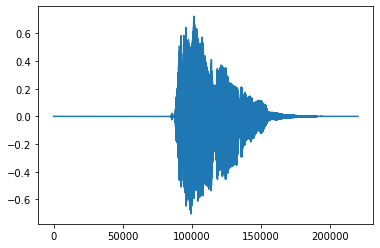

430 - 440
Peaks  31278
Zero crossings  45959


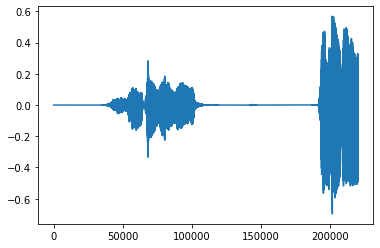

440 - 450
Peaks  20866
Zero crossings  20107


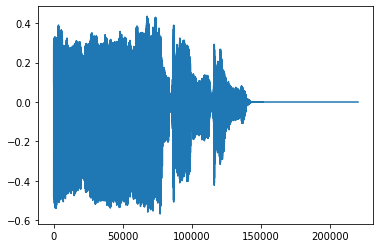

450 - 460
Peaks  17073
Zero crossings  16726


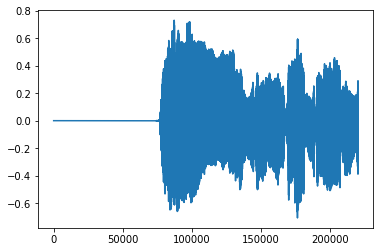

460 - 470
Peaks  16718
Zero crossings  13556


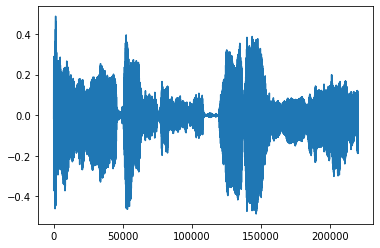

470 - 480
Peaks  10608
Zero crossings  9427


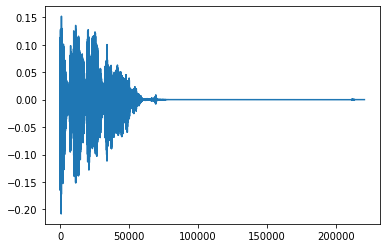

480 - 490
Peaks  35461
Zero crossings  25749


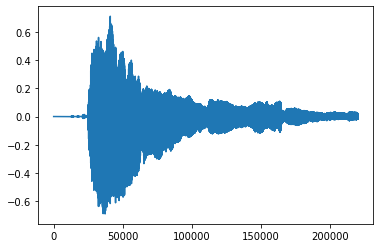

490 - 500
Peaks  28514
Zero crossings  28653


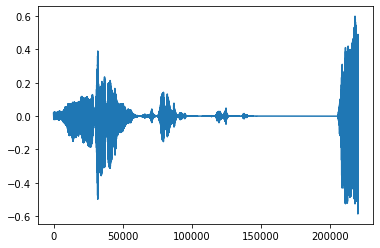

500 - 510
Peaks  25081
Zero crossings  27438


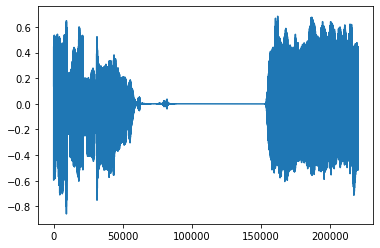

510 - 520
Peaks  17984
Zero crossings  16525


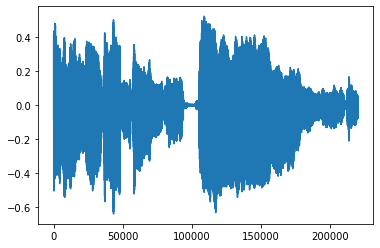

520 - 530
Peaks  31398
Zero crossings  28107


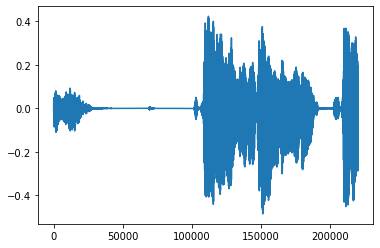

530 - 540
Peaks  17827
Zero crossings  16727


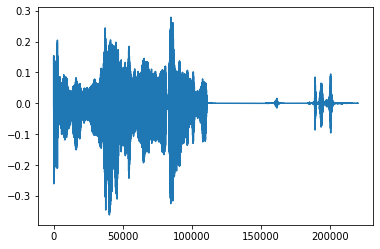

540 - 550
Peaks  26339
Zero crossings  21804


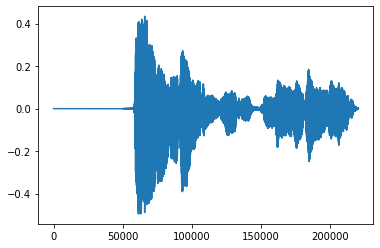

550 - 560
Peaks  32561
Zero crossings  30436


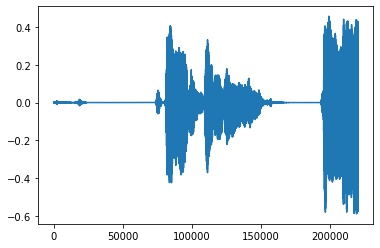

560 - 570
Peaks  17105
Zero crossings  13592


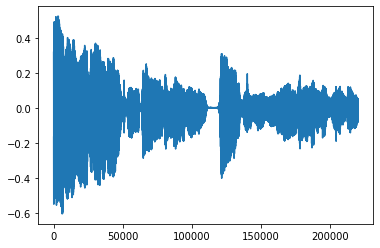

570 - 580
Peaks  8457
Zero crossings  10555


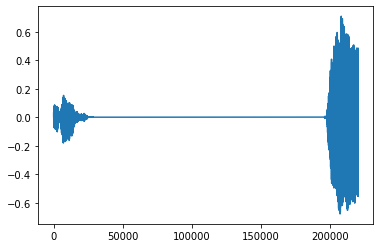

580 - 590
Peaks  22574
Zero crossings  19780


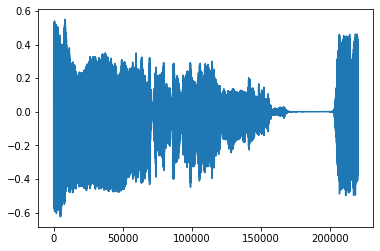

590 - 600
Peaks  17685
Zero crossings  14726


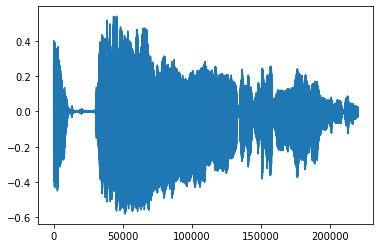

600 - 610
Peaks  26134
Zero crossings  28823


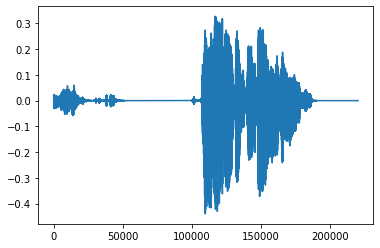

610 - 620
Peaks  17578
Zero crossings  13809


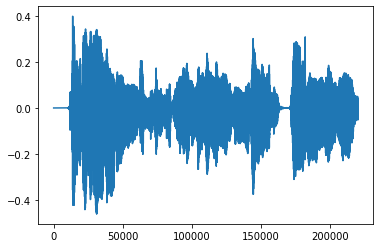

620 - 630
Peaks  17819
Zero crossings  17449


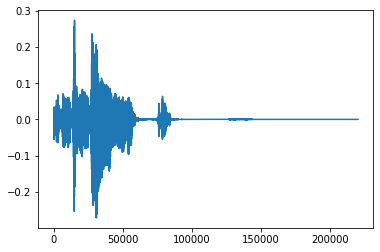

630 - 640
Peaks  28706
Zero crossings  30872


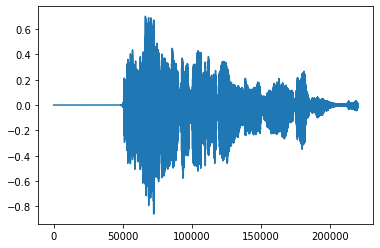

640 - 650
Peaks  21566
Zero crossings  13134


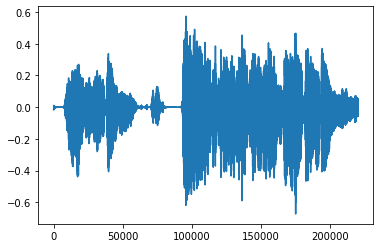

650 - 660
Peaks  18490
Zero crossings  18833


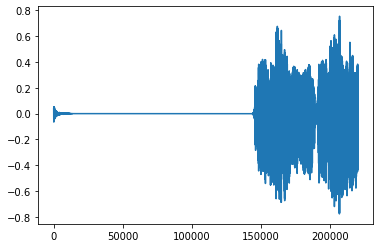

660 - 670
Peaks  19773
Zero crossings  14457


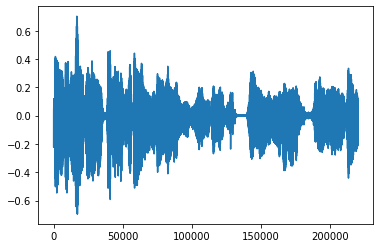

670 - 680
Peaks  24634
Zero crossings  33684


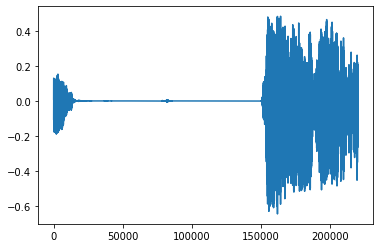

680 - 690
Peaks  18894
Zero crossings  18305


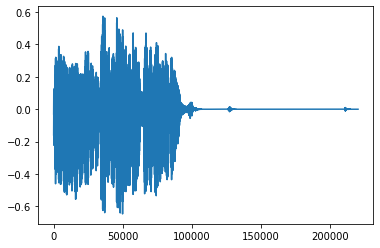

690 - 700
Peaks  56739
Zero crossings  98240


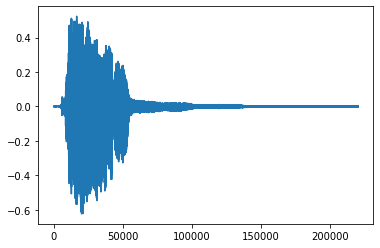

700 - 710
Peaks  31199
Zero crossings  30331


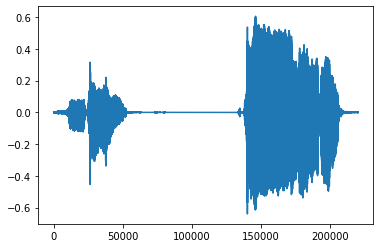

710 - 720
Peaks  22547
Zero crossings  20768


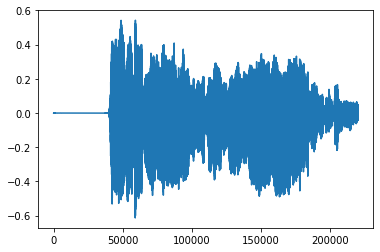

720 - 730
Peaks  16452
Zero crossings  18047


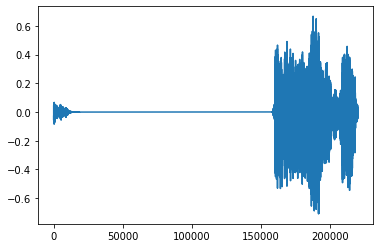

730 - 740
Peaks  22364
Zero crossings  20753


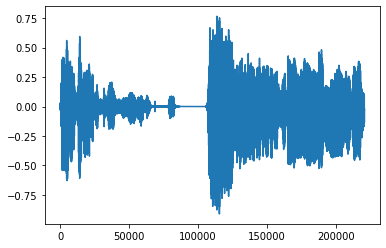

740 - 750
Peaks  19969
Zero crossings  17895


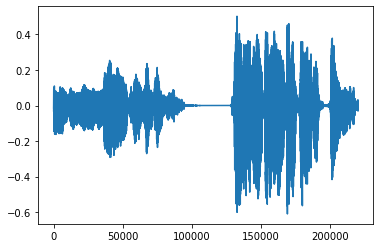

750 - 760
Peaks  18559
Zero crossings  19246


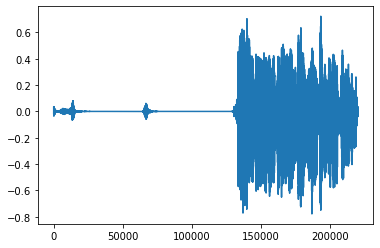

760 - 770
Peaks  24658
Zero crossings  23278


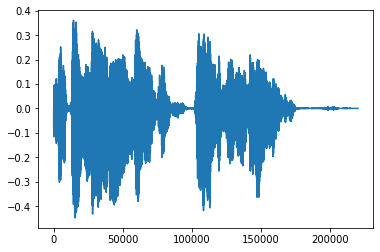

770 - 780
Peaks  21752
Zero crossings  28426


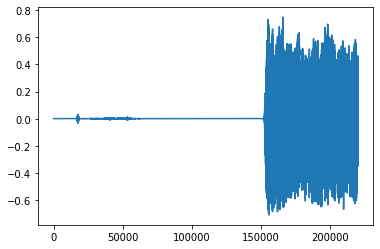

780 - 790
Peaks  19185
Zero crossings  14749


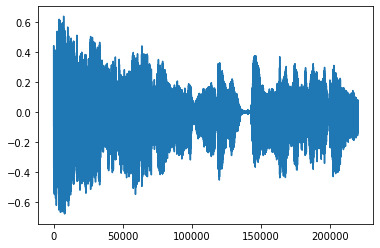

790 - 800
Peaks  26592
Zero crossings  34951


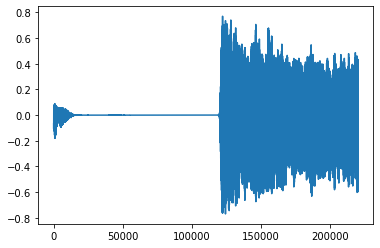

800 - 810
Peaks  32957
Zero crossings  34849


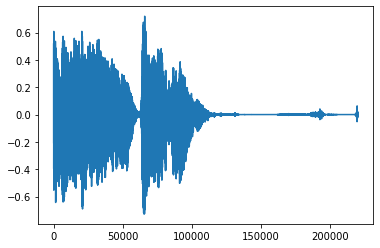

810 - 820
Peaks  20746
Zero crossings  18628


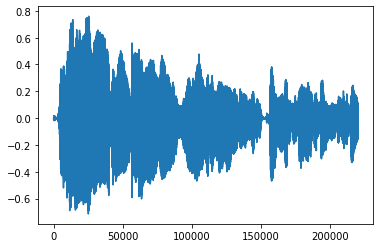

820 - 830
Peaks  16980
Zero crossings  19234


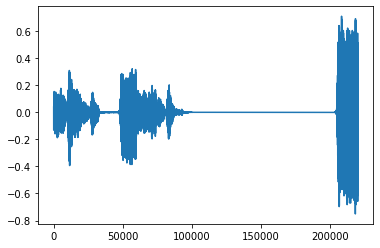

830 - 840
Peaks  30590
Zero crossings  34447


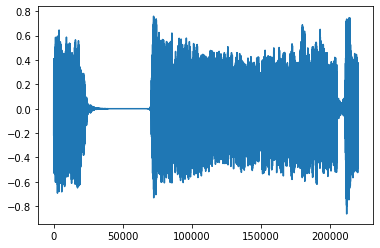

840 - 850
Peaks  18999
Zero crossings  13436


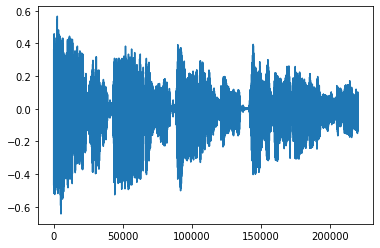

850 - 860
Peaks  16820
Zero crossings  12084


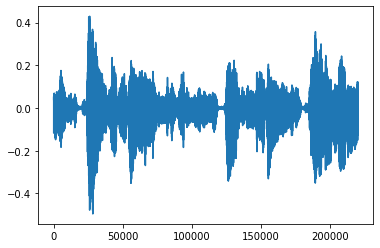

860 - 870
Peaks  19134
Zero crossings  26219


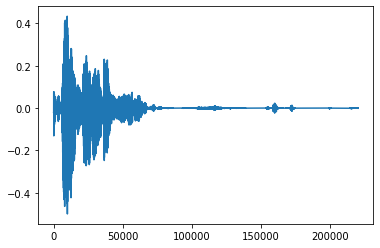

870 - 880
Peaks  28449
Zero crossings  30738


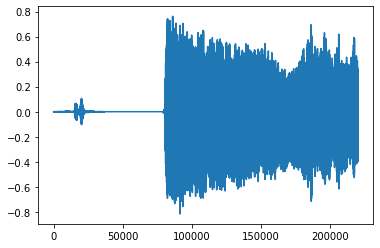

880 - 890
Peaks  19358
Zero crossings  20204


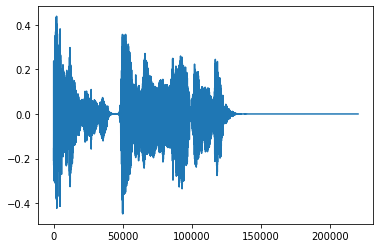

890 - 900
Peaks  23341
Zero crossings  23136


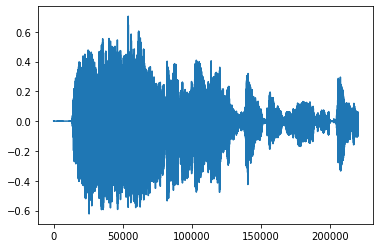

900 - 910
Peaks  33539
Zero crossings  38693


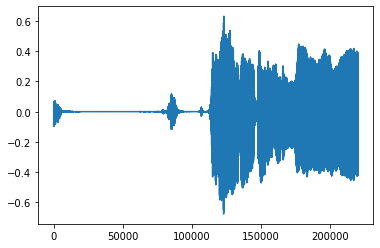

910 - 920
Peaks  24612
Zero crossings  26986


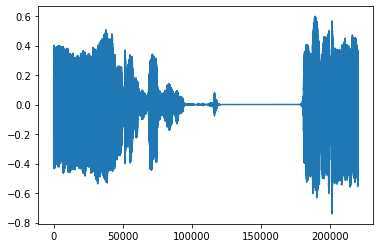

920 - 930
Peaks  21544
Zero crossings  16992


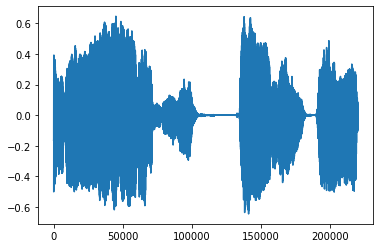

930 - 940
Peaks  19608
Zero crossings  16535


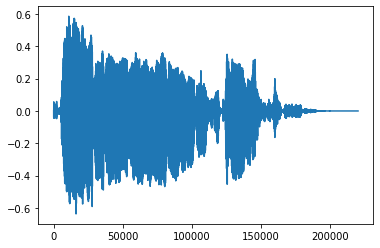

940 - 950
Peaks  23845
Zero crossings  35460


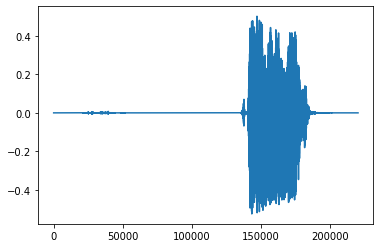

950 - 960
Peaks  26333
Zero crossings  23905


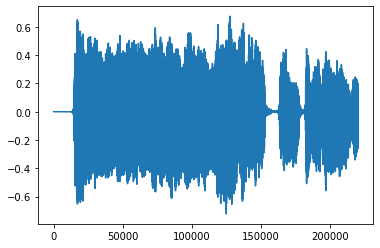

960 - 970
Peaks  17776
Zero crossings  14827


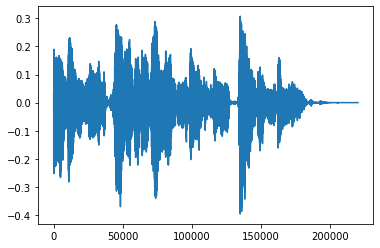

970 - 980
Peaks  27080
Zero crossings  32050


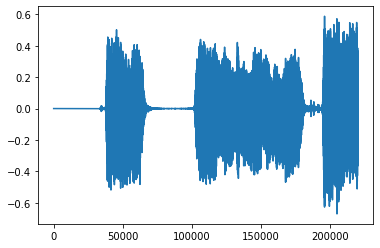

980 - 990
Peaks  22967
Zero crossings  17169


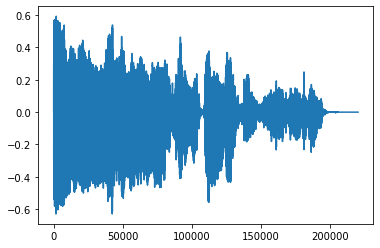

990 - 1000
Peaks  19385
Zero crossings  17080


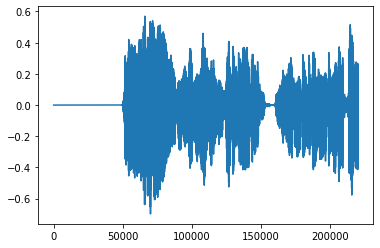

1000 - 1010
Peaks  21421
Zero crossings  20498


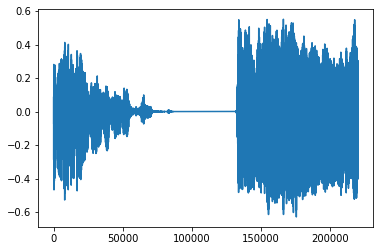

1010 - 1020
Peaks  21051
Zero crossings  14098


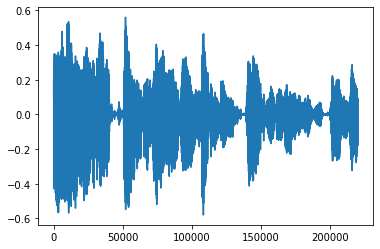

1020 - 1030
Peaks  18643
Zero crossings  16376


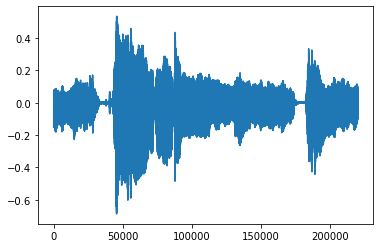

1030 - 1040
Peaks  22882
Zero crossings  32371


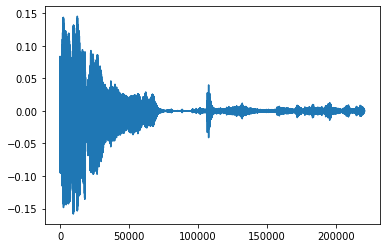

In [20]:
plot_audio("/gdrive/My Drive/Major Project/Vocals/Abhogi/Bonus_Track_b63f8746-775e-447b-8bd5-1f32c4ef0b44/vocals.wav")